## Dataset Overview
This dataset provides a country-level snapshot of COVID-19 indicators

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("worldometer_data.csv")

df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


COVID-19 indicators vary widely across countries, with a small number of countries accounting for most cases, deaths, and tests. This creates highly skewed distributions, making medians more representative than means for typical countries.

In [6]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [11]:
df.isna().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [13]:
# Fill metadata with 'Unknown'
df["Continent"] = df["Continent"].fillna("Unknown")
df["WHO Region"] = df["WHO Region"].fillna("Unknown")

# For daily new values, fill missing with 0 (often means not reported)
for c in ["NewCases", "NewDeaths", "NewRecovered"]:
    if c in df.columns:
        df[c] = df[c].fillna(0)

# For totals, leave NaN if missing (don't invent totals)
# Optional: fill ActiveCases if you want consistency later
    

In [15]:
df.isna().sum()


Country/Region       0
Continent            0
Population           1
TotalCases           0
NewCases             0
TotalDeaths         21
NewDeaths            0
TotalRecovered       4
NewRecovered         0
ActiveCases          4
Serious,Critical    87
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
WHO Region           0
dtype: int64

The dataset contains genuine reporting gaps for certain countries, particularly in testing and serious/critical case counts. These values were left as missing to avoid introducing artificial data. For specific analyses, rows with missing values in the relevant columns were excluded on a per-analysis basis.

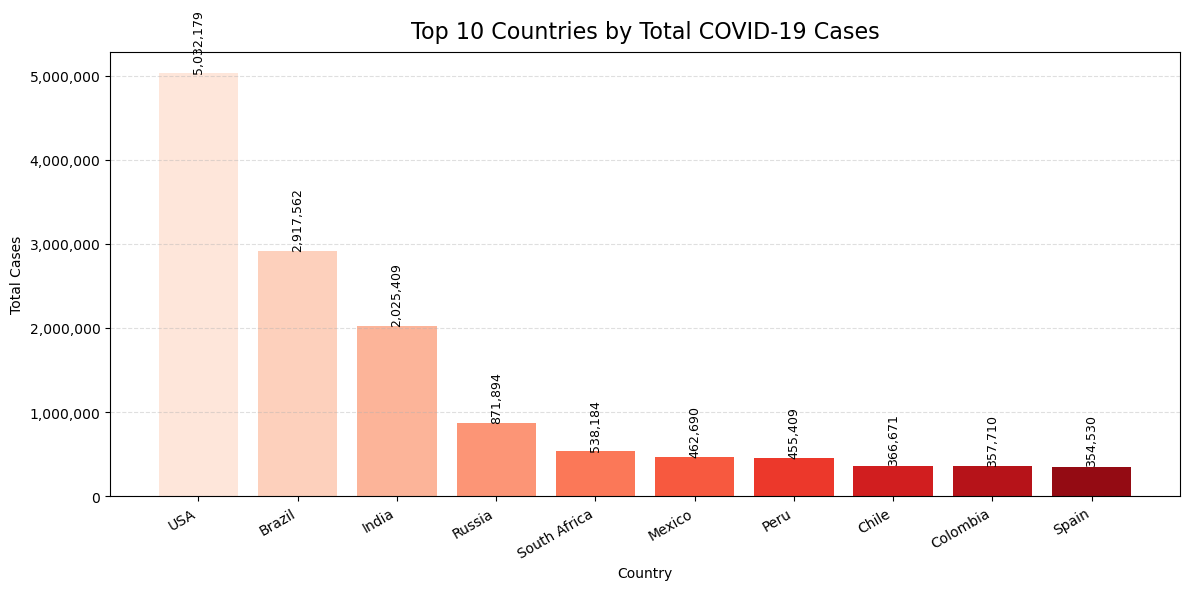

In [22]:
import matplotlib.ticker as mtick
import numpy as np

plt.figure(figsize=(12, 6))

colors = sns.color_palette("Reds", len(top10_cases))
bars = plt.bar(top10_cases["Country/Region"], top10_cases["TotalCases"], color=colors)

plt.title("Top 10 Countries by Total COVID-19 Cases", fontsize=16, pad=10)
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, ha="right")

# Add value labels on bars (optional but looks pro)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(height):,}", 
             ha="center", va="bottom", fontsize=9, rotation=90)

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

This chart shows raw total case counts, which are heavily influenced by country population size. Large countries appear at the top mainly because they have more people, so per-million metrics are needed for fair comparison.

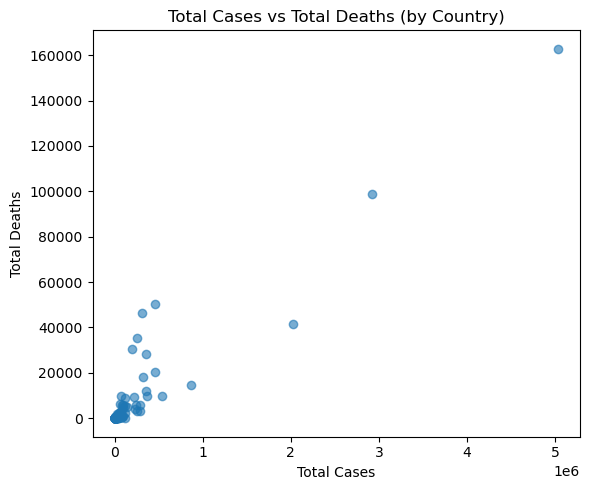

In [26]:
subset = df[["TotalCases", "TotalDeaths"]].dropna()

plt.figure(figsize=(6, 5))
plt.scatter(subset["TotalCases"], subset["TotalDeaths"], alpha=0.6)
plt.title("Total Cases vs Total Deaths (by Country)")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()


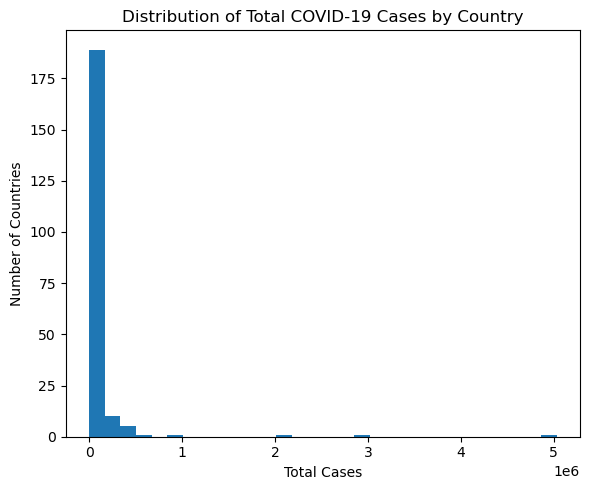

In [20]:
plt.figure(figsize=(6, 5))
plt.hist(df["TotalCases"].dropna(), bins=30)
plt.title("Distribution of Total COVID-19 Cases by Country")
plt.xlabel("Total Cases")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


In [30]:
subset_pm = df[["Country/Region", "Tot Cases/1M pop", "Deaths/1M pop"]].dropna()


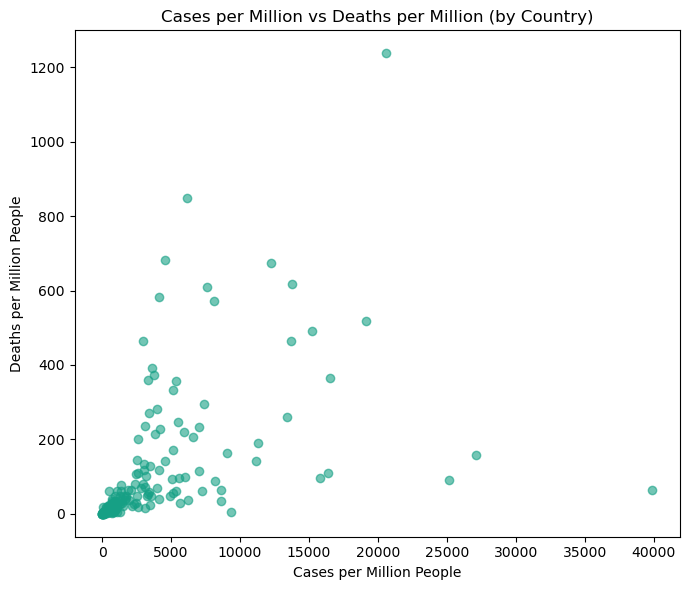

In [32]:
plt.figure(figsize=(7, 6))
plt.scatter(subset_pm["Tot Cases/1M pop"], subset_pm["Deaths/1M pop"], alpha=0.6, color="#16a085")
plt.xlabel("Cases per Million People")
plt.ylabel("Deaths per Million People")
plt.title("Cases per Million vs Deaths per Million (by Country)")
plt.tight_layout()
plt.show()


This plot compares countries based on cases per million and deaths per million, enabling fair comparison across countries of different population sizes. Countries with higher detected case rates per million generally show higher deaths per million, indicating higher overall COVID-19 burden.

In [37]:
top10_tests_pm = (
    df[["Country/Region", "Tests/1M pop"]]
    .dropna()
    .sort_values("Tests/1M pop", ascending=False)
    .head(10)
)


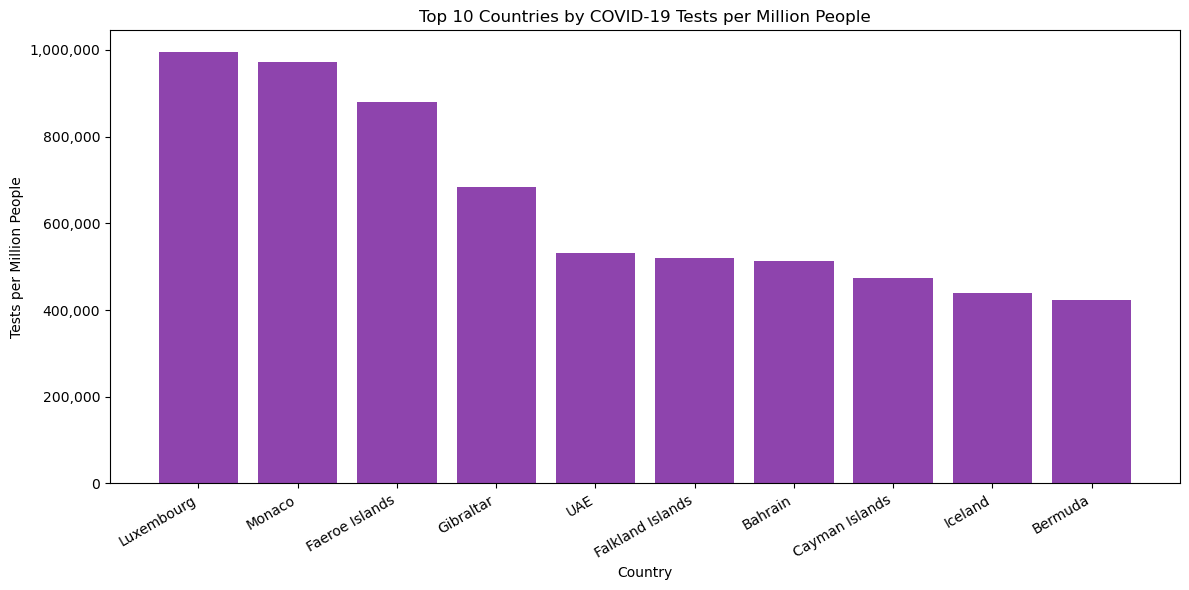

In [39]:
plt.figure(figsize=(12, 6))
plt.bar(top10_tests_pm["Country/Region"], top10_tests_pm["Tests/1M pop"], color="#8e44ad")
plt.title("Top 10 Countries by COVID-19 Tests per Million People")
plt.xlabel("Country")
plt.ylabel("Tests per Million People")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

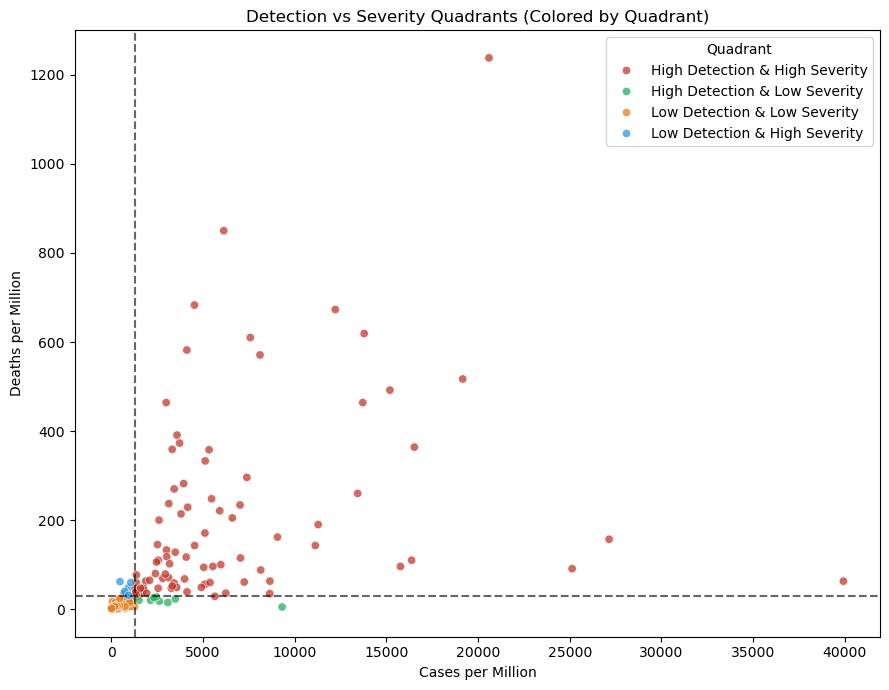

In [41]:
subset_pm = df[["Country/Region", "Tot Cases/1M pop", "Deaths/1M pop"]].dropna()

x_med = subset_pm["Tot Cases/1M pop"].median()
y_med = subset_pm["Deaths/1M pop"].median()

def quadrant(row):
    if row["Tot Cases/1M pop"] >= x_med and row["Deaths/1M pop"] >= y_med:
        return "High Detection & High Severity"
    elif row["Tot Cases/1M pop"] >= x_med and row["Deaths/1M pop"] < y_med:
        return "High Detection & Low Severity"
    elif row["Tot Cases/1M pop"] < x_med and row["Deaths/1M pop"] >= y_med:
        return "Low Detection & High Severity"
    else:
        return "Low Detection & Low Severity"

subset_pm["Quadrant"] = subset_pm.apply(quadrant, axis=1)

plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=subset_pm,
    x="Tot Cases/1M pop",
    y="Deaths/1M pop",
    hue="Quadrant",
    palette=["#c0392b", "#27ae60", "#e67e22", "#3498db"],
    alpha=0.75
)

plt.axvline(x_med, linestyle="--", color="black", alpha=0.6)
plt.axhline(y_med, linestyle="--", color="black", alpha=0.6)

plt.xlabel("Cases per Million")
plt.ylabel("Deaths per Million")
plt.title("Detection vs Severity Quadrants (Colored by Quadrant)")
plt.tight_layout()
plt.show()

Countries fall into four patterns: high detection/high deaths, high detection/low deaths, low detection/high deaths, and low detection/low deaths. This helps identify where outcomes differ despite similar detection levels.

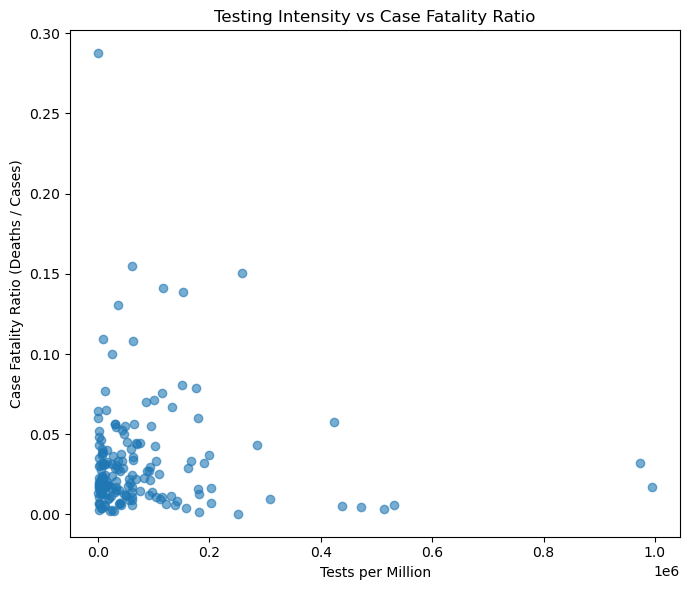

In [35]:
df["CFR"] = df["TotalDeaths"] / df["TotalCases"]

subset = df[["Country/Region", "Tests/1M pop", "CFR"]].dropna()

plt.figure(figsize=(7,6))
plt.scatter(subset["Tests/1M pop"], subset["CFR"], alpha=0.6)
plt.xlabel("Tests per Million")
plt.ylabel("Case Fatality Ratio (Deaths / Cases)")
plt.title("Testing Intensity vs Case Fatality Ratio")
plt.tight_layout()
plt.show()


You often see higher testing associated with lower apparent fatality (more mild cases detected).

In [48]:
import altair as alt

subset_pm = df[["Country/Region", "Tot Cases/1M pop", "Deaths/1M pop", "WHO Region"]].dropna()

x_med = subset_pm["Tot Cases/1M pop"].median()
y_med = subset_pm["Deaths/1M pop"].median()

base = alt.Chart(subset_pm).mark_circle(size=80).encode(
    x=alt.X("Tot Cases/1M pop:Q", title="Cases per Million"),
    y=alt.Y("Deaths/1M pop:Q", title="Deaths per Million"),
    color=alt.Color("WHO Region:N", legend=alt.Legend(title="WHO Region")),
    tooltip=["Country/Region:N", "Tot Cases/1M pop:Q", "Deaths/1M pop:Q"]
).properties(
    width=600,
    height=450,
    title="Detection vs Severity (Hover to See Country)"
)

vline = alt.Chart(pd.DataFrame({"x": [x_med]})).mark_rule(strokeDash=[6, 4]).encode(x="x:Q")
hline = alt.Chart(pd.DataFrame({"y": [y_med]})).mark_rule(strokeDash=[6, 4]).encode(y="y:Q")

(base + vline + hline).interactive()

alt.LayerChart(...)